<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment12/Session12_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install albumentations

     |████████████████████████████████| 634kB 32.1MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=b0f94e7fd7bed5acbd835b6a9535b27e3d40809e6312be98191198ec9b3df9ea
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [4]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from training import *
from torchsummary import summary
from TinyImgNet import *
# getting the data
trainloader, testloader = getData()



 Already downloaded
Starting data loading
Finished data loading, in 0.10413265228271484 seconds


In [5]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = torchvision.models.resnet18(pretrained=False, num_classes=200).cuda(device)#().to(device) # #
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 64, 64))


cuda


RuntimeError: ignored


Learning rate search finished. See the graph with {finder_name}.plot()


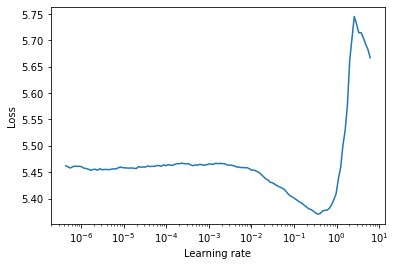

In [7]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=150)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [8]:
# Training starts here
Training(50,model,device, trainloader, testloader,.3 )


  0%|          | 0/154 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.729175090789795 Batch_id=153 Accuracy=2.83: 100%|██████████| 154/154 [00:47<00:00,  3.27it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -1.4510, Accuracy: 1544/33000 (4.68%)

EPOCH: 1


Loss=4.349793434143066 Batch_id=153 Accuracy=8.39: 100%|██████████| 154/154 [00:46<00:00,  3.28it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -2.4302, Accuracy: 3527/33000 (10.69%)

EPOCH: 2


Loss=3.785156011581421 Batch_id=153 Accuracy=14.07: 100%|██████████| 154/154 [00:46<00:00,  3.29it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -3.3446, Accuracy: 5403/33000 (16.37%)

EPOCH: 3


Loss=3.5596725940704346 Batch_id=153 Accuracy=18.92: 100%|██████████| 154/154 [00:46<00:00,  3.31it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -3.8395, Accuracy: 6508/33000 (19.72%)

EPOCH: 4


Loss=3.4092695713043213 Batch_id=153 Accuracy=23.01: 100%|██████████| 154/154 [00:46<00:00,  3.34it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.4884, Accuracy: 7750/33000 (23.48%)

EPOCH: 5


Loss=3.1835126876831055 Batch_id=153 Accuracy=26.35: 100%|██████████| 154/154 [00:45<00:00,  3.35it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.4812, Accuracy: 8501/33000 (25.76%)

EPOCH: 6


Loss=2.987708568572998 Batch_id=153 Accuracy=30.50: 100%|██████████| 154/154 [00:46<00:00,  3.35it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.1725, Accuracy: 9056/33000 (27.44%)

EPOCH: 7


Loss=2.779893636703491 Batch_id=153 Accuracy=33.62: 100%|██████████| 154/154 [00:46<00:00,  3.34it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.6202, Accuracy: 9290/33000 (28.15%)

EPOCH: 8


Loss=2.4623239040374756 Batch_id=153 Accuracy=37.21: 100%|██████████| 154/154 [00:46<00:00,  3.33it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.1150, Accuracy: 10746/33000 (32.56%)

EPOCH: 9


Loss=2.51920747756958 Batch_id=153 Accuracy=40.63: 100%|██████████| 154/154 [00:46<00:00,  3.30it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.1927, Accuracy: 10136/33000 (30.72%)

EPOCH: 10


Loss=2.3012003898620605 Batch_id=153 Accuracy=43.99: 100%|██████████| 154/154 [00:50<00:00,  3.08it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.6826, Accuracy: 10997/33000 (33.32%)

EPOCH: 11


Loss=2.3051741123199463 Batch_id=153 Accuracy=47.07: 100%|██████████| 154/154 [00:47<00:00,  3.22it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.7362, Accuracy: 10135/33000 (30.71%)

EPOCH: 12


Loss=2.1589746475219727 Batch_id=153 Accuracy=50.61: 100%|██████████| 154/154 [00:48<00:00,  3.20it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.4879, Accuracy: 10928/33000 (33.12%)

EPOCH: 13


Loss=1.8267216682434082 Batch_id=153 Accuracy=54.21: 100%|██████████| 154/154 [00:49<00:00,  3.13it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.8081, Accuracy: 10702/33000 (32.43%)

EPOCH: 14


Loss=1.7096576690673828 Batch_id=153 Accuracy=57.94: 100%|██████████| 154/154 [00:49<00:00,  3.13it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.0407, Accuracy: 11021/33000 (33.40%)

EPOCH: 15


Loss=1.5144524574279785 Batch_id=153 Accuracy=61.31: 100%|██████████| 154/154 [00:47<00:00,  3.27it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.4660, Accuracy: 11128/33000 (33.72%)

EPOCH: 16


Loss=1.487154483795166 Batch_id=153 Accuracy=65.21: 100%|██████████| 154/154 [00:46<00:00,  3.30it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.5764, Accuracy: 10742/33000 (32.55%)

EPOCH: 17


Loss=1.1866642236709595 Batch_id=153 Accuracy=68.61: 100%|██████████| 154/154 [00:45<00:00,  3.36it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.2442, Accuracy: 11065/33000 (33.53%)

EPOCH: 18


Loss=1.1669524908065796 Batch_id=153 Accuracy=72.00: 100%|██████████| 154/154 [00:45<00:00,  3.37it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.6202, Accuracy: 10967/33000 (33.23%)

EPOCH: 19


Loss=0.9514620304107666 Batch_id=153 Accuracy=74.81: 100%|██████████| 154/154 [00:45<00:00,  3.35it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.8556, Accuracy: 10620/33000 (32.18%)

EPOCH: 20


Loss=0.8486256003379822 Batch_id=153 Accuracy=77.81: 100%|██████████| 154/154 [00:45<00:00,  3.39it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.5262, Accuracy: 10667/33000 (32.32%)

EPOCH: 21


Loss=0.8629587292671204 Batch_id=153 Accuracy=80.18: 100%|██████████| 154/154 [00:45<00:00,  3.38it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.7985, Accuracy: 10891/33000 (33.00%)

EPOCH: 22


Loss=0.6475363969802856 Batch_id=153 Accuracy=82.09: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.9232, Accuracy: 11020/33000 (33.39%)

EPOCH: 23


Loss=0.6653227806091309 Batch_id=153 Accuracy=83.66: 100%|██████████| 154/154 [00:45<00:00,  3.38it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.2732, Accuracy: 10854/33000 (32.89%)

EPOCH: 24


Loss=0.5262071490287781 Batch_id=153 Accuracy=85.79: 100%|██████████| 154/154 [00:45<00:00,  3.38it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.6410, Accuracy: 11040/33000 (33.45%)

EPOCH: 25


Loss=0.49433812499046326 Batch_id=153 Accuracy=87.32: 100%|██████████| 154/154 [00:45<00:00,  3.40it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.0887, Accuracy: 11168/33000 (33.84%)

EPOCH: 26


Loss=0.41539421677589417 Batch_id=153 Accuracy=88.43: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.0211, Accuracy: 11089/33000 (33.60%)

EPOCH: 27


Loss=0.3901021182537079 Batch_id=153 Accuracy=89.71: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.6591, Accuracy: 11352/33000 (34.40%)

EPOCH: 28


Loss=0.3958926796913147 Batch_id=153 Accuracy=90.56: 100%|██████████| 154/154 [00:45<00:00,  3.40it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.4617, Accuracy: 11125/33000 (33.71%)

EPOCH: 29


Loss=0.2927074730396271 Batch_id=153 Accuracy=91.53: 100%|██████████| 154/154 [00:45<00:00,  3.39it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.9069, Accuracy: 11280/33000 (34.18%)

EPOCH: 30


Loss=0.36776968836784363 Batch_id=153 Accuracy=92.05: 100%|██████████| 154/154 [00:45<00:00,  3.42it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.8741, Accuracy: 11315/33000 (34.29%)

EPOCH: 31


Loss=0.20133087038993835 Batch_id=153 Accuracy=92.92: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.4329, Accuracy: 11204/33000 (33.95%)

EPOCH: 32


Loss=0.19542479515075684 Batch_id=153 Accuracy=93.52: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.2402, Accuracy: 11268/33000 (34.15%)

EPOCH: 33


Loss=0.19772852957248688 Batch_id=153 Accuracy=94.24: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.6797, Accuracy: 11464/33000 (34.74%)

EPOCH: 34


Loss=0.22824078798294067 Batch_id=153 Accuracy=94.67: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.7855, Accuracy: 11437/33000 (34.66%)

EPOCH: 35


Loss=0.14039000868797302 Batch_id=153 Accuracy=94.95: 100%|██████████| 154/154 [00:45<00:00,  3.39it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.9340, Accuracy: 11415/33000 (34.59%)

EPOCH: 36


Loss=0.14398211240768433 Batch_id=153 Accuracy=95.38: 100%|██████████| 154/154 [00:44<00:00,  3.44it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.9741, Accuracy: 11541/33000 (34.97%)

EPOCH: 37


Loss=0.1669035702943802 Batch_id=153 Accuracy=95.80: 100%|██████████| 154/154 [00:44<00:00,  3.44it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.2327, Accuracy: 11598/33000 (35.15%)

EPOCH: 38


Loss=0.10526833683252335 Batch_id=153 Accuracy=96.21: 100%|██████████| 154/154 [00:45<00:00,  3.40it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.2372, Accuracy: 11489/33000 (34.82%)

EPOCH: 39


Loss=0.13516736030578613 Batch_id=153 Accuracy=96.27: 100%|██████████| 154/154 [00:45<00:00,  3.41it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.2286, Accuracy: 11489/33000 (34.82%)

EPOCH: 40


Loss=0.0559253990650177 Batch_id=153 Accuracy=96.59: 100%|██████████| 154/154 [00:45<00:00,  3.42it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.5573, Accuracy: 11647/33000 (35.29%)

EPOCH: 41


Loss=0.07687938213348389 Batch_id=153 Accuracy=97.02: 100%|██████████| 154/154 [00:45<00:00,  3.40it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.5725, Accuracy: 11690/33000 (35.42%)

EPOCH: 42


Loss=0.08005862683057785 Batch_id=153 Accuracy=97.24: 100%|██████████| 154/154 [00:45<00:00,  3.39it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.7120, Accuracy: 11684/33000 (35.41%)

EPOCH: 43


Loss=0.12946484982967377 Batch_id=153 Accuracy=97.39: 100%|██████████| 154/154 [00:45<00:00,  3.39it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.6522, Accuracy: 11607/33000 (35.17%)

EPOCH: 44


Loss=0.05460455268621445 Batch_id=153 Accuracy=97.60: 100%|██████████| 154/154 [00:45<00:00,  3.37it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.9310, Accuracy: 11717/33000 (35.51%)

EPOCH: 45


Loss=0.09543688595294952 Batch_id=153 Accuracy=97.75: 100%|██████████| 154/154 [00:45<00:00,  3.36it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.0356, Accuracy: 11903/33000 (36.07%)

EPOCH: 46


Loss=0.0672493726015091 Batch_id=153 Accuracy=97.93: 100%|██████████| 154/154 [00:46<00:00,  3.34it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.1659, Accuracy: 11891/33000 (36.03%)

EPOCH: 47


Loss=0.09477872401475906 Batch_id=153 Accuracy=98.07: 100%|██████████| 154/154 [00:47<00:00,  3.24it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.1356, Accuracy: 11797/33000 (35.75%)

EPOCH: 48


Loss=0.06468989700078964 Batch_id=153 Accuracy=98.18: 100%|██████████| 154/154 [00:47<00:00,  3.27it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.2957, Accuracy: 11878/33000 (35.99%)

EPOCH: 49


Loss=0.06401043385267258 Batch_id=153 Accuracy=98.28: 100%|██████████| 154/154 [00:46<00:00,  3.28it/s]



Test set: Average loss: -15.2902, Accuracy: 11843/33000 (35.89%)



In [0]:
# Calsswise accuracy 
#ClassTestAccuracy(testloader,device,model,classes)

In [0]:

#MissClassifedImage(testData,model,device,3,classes)

In [0]:
plotPerformanceGraph( )